# **Bi-Axial LSTM Model Trained Using Tensorflow**

## Preparation

In [5]:
from data import *
from layers import *
import tensorflow as tf
from data import genBatch
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Build a sequential model using Tensorflow.Keras.Sequential

In [28]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(128, 128, 2), dtype=tf.float64),
    transformLayer(input_dim=(10, 128, 128, 2)),
    tf.keras.layers.LSTM(300, input_dim=(10 * 128, 128, 80), recurrent_dropout=0.5, return_sequences=True),
    tf.keras.layers.LSTM(300, return_sequences=True, recurrent_dropout=0.5),
    changeAxisLayer1(input_dim=(10*128,128,300)),
    tf.keras.layers.LSTM(100,return_sequences=True, recurrent_dropout=0.5),
    tf.keras.layers.LSTM(50,return_sequences=True, recurrent_dropout=0.5),
    changeAxisLayer2(input_dim=(10*128,128,50)),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

model.compile(loss=LossAligned(),
              optimizer='RMSprop',
              metrics=['binary_crossentropy','accuracy','AUC'])

model.summary()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
transform_layer_1 (transform (None, None, 80)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 300)         457200    
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 300)         721200    
________________________

## Prepare the training and validation data using generators

In [101]:
train_gen = genBatch('train')
val_gen = genBatch('validation')

train_ds = tf.data.Dataset.from_generator(lambda: train_gen, (tf.float64, tf.float64), 
                                          ((10, 128, 128, 2),(10, 128, 128, 2))).repeat()
val_ds = tf.data.Dataset.from_generator(lambda: val_gen, (tf.float64, tf.float64), 
                                        ((10, 128, 128, 2),(10, 128, 128, 2))).repeat()

## Train the model

In [29]:
history_LSTM = model.fit(train_ds, validation_data=val_ds, 
                         steps_per_epoch=30, validation_steps=5, epochs=30)

Epoch 1/30
30/30 [==============================] - 524s 17s/step - loss: 0.1759 - binary_crossentropy: 0.1760 - accuracy: 0.9720 - auc: 0.9661 - val_loss: 0.0706 - val_binary_crossentropy: 0.0708 - val_accuracy: 0.9918 - val_auc: 0.9911
Epoch 2/30
30/30 [==============================] - 484s 16s/step - loss: 0.0611 - binary_crossentropy: 0.0614 - accuracy: 0.9860 - auc: 0.9910 - val_loss: 0.0512 - val_binary_crossentropy: 0.0515 - val_accuracy: 0.9843 - val_auc: 0.9938
Epoch 3/30
30/30 [==============================] - 535s 18s/step - loss: 0.0465 - binary_crossentropy: 0.0468 - accuracy: 0.9804 - auc: 0.9941 - val_loss: 0.0473 - val_binary_crossentropy: 0.0476 - val_accuracy: 0.9770 - val_auc: 0.9938
Epoch 4/30
30/30 [==============================] - 529s 18s/step - loss: 0.0429 - binary_crossentropy: 0.0433 - accuracy: 0.8325 - auc: 0.9944 - val_loss: 0.0668 - val_binary_crossentropy: 0.0665 - val_accuracy: 0.5019 - val_auc: 0.9939
Epoch 5/30
30/30 [==============================

In [30]:
model.save('model/model_1219_2') 

INFO:tensorflow:Assets written to: model/model_1219_2/assets


In [6]:
# reload model
# model = tf.keras.models.load_model('model/model_1219_2/')

## Plot the loss function and log likelihood

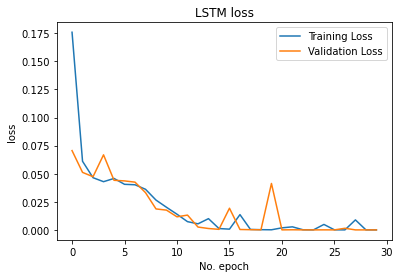

In [87]:
plt.plot(history_LSTM.history['loss'], label='Training Loss')
plt.plot(history_LSTM.history['val_loss'], label='Validation Loss')
plt.title('LSTM loss')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [88]:
log_likelihood = np.asarray(history_LSTM.history['loss'])*(-128)
val_log_likelihood = np.asarray(history_LSTM.history['val_loss'])*(-128)

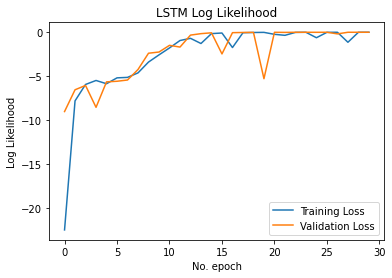

In [92]:
plt.plot(list(range(30)), log_likelihood, label='Training Loss')
plt.plot(list(range(30)), val_log_likelihood, label='Validation Loss')
plt.title('LSTM Log Likelihood')
plt.ylabel('Log Likelihood')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

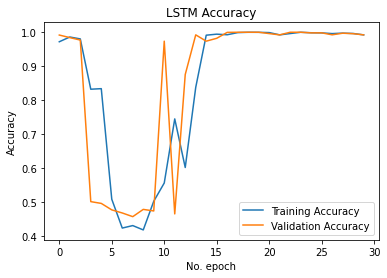

In [90]:
plt.plot(history_LSTM.history['accuracy'], label='Training Accuracy')
plt.plot(history_LSTM.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

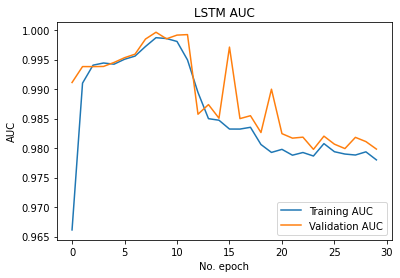

In [91]:
plt.plot(history_LSTM.history['auc'], label='Training AUC')
plt.plot(history_LSTM.history['val_auc'], label='Validation AUC')
plt.title('LSTM AUC')
plt.ylabel('AUC')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Making a prediction

In [39]:
# create sample pieces
probs = model.predict(next(val_gen)[0])

toMidi(probs[1])

note_on: note_on channel=0 note=25 velocity=40 time=0
note_on: note_on channel=0 note=32 velocity=40 time=0
note_on: note_on channel=0 note=34 velocity=40 time=0
note_on: note_on channel=0 note=37 velocity=40 time=0
note_on: note_on channel=0 note=41 velocity=40 time=0
note_on: note_on channel=0 note=42 velocity=40 time=0
note_on: note_on channel=0 note=44 velocity=40 time=0
note_on: note_on channel=0 note=46 velocity=40 time=0
note_on: note_on channel=0 note=49 velocity=40 time=0
note_on: note_on channel=0 note=53 velocity=40 time=0
note_on: note_on channel=0 note=54 velocity=40 time=0
note_on: note_on channel=0 note=56 velocity=40 time=0
note_on: note_on channel=0 note=58 velocity=40 time=0
note_on: note_on channel=0 note=60 velocity=40 time=0
note_on: note_on channel=0 note=61 velocity=40 time=0
note_on: note_on channel=0 note=63 velocity=40 time=0
note_on: note_on channel=0 note=65 velocity=40 time=0
note_on: note_on channel=0 note=66 velocity=40 time=0
note_on: note_on channel=0 n